In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import matplotlib.pyplot as plt
import warnings 
import tensorflow as tf
warnings.filterwarnings(action='ignore')
from tensorflow.keras import preprocessing
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import gensim

In [3]:
train = pd.read_csv('train.csv',encoding='utf-8') #encoding = 'utf-8'
test = pd.read_csv('test_x.csv',encoding='utf-8')
sample_submission = pd.read_csv('sample_submission.csv', encoding = 'utf-8')

In [4]:
train.head()

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3


In [5]:
test.head()

,index,text
0,0,“Not at all. I think she is one of the most ch...
1,1,"""No,"" replied he, with sudden consciousness, ""..."
2,2,As the lady had stated her intention of scream...
3,3,“And then suddenly in the silence I heard a so...
4,4,His conviction remained unchanged. So far as I...


## 전처리

In [6]:
def alpha_num(text):#기호 제거
    return re.sub(r'[^A-Za-z0-9]', ' ', text)
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [7]:
def remove_stopwords(text):#불용어처리
    final_text=[]
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return ' '.join(final_text)

In [8]:
train['text']=train['text'].str.lower()
test['text']=test['text'].str.lower()
train['text']=train['text'].apply(alpha_num).apply(remove_stopwords)
test['text']=test['text'].apply(alpha_num).apply(remove_stopwords)
train.head()

,index,text,author
0,0,almost choking much much wanted say strange ex...,3
1,1,sister asked suppose,2
2,2,engaged one day walked perusing jane s last le...,1
3,3,captain porch keeping carefully way treacherou...,4
4,4,mercy gentlemen odin flung hands don t write a...,3


In [9]:
test.head()

,index,text
0,0,not think one charming young ladies ever met m...
1,1,no replied sudden consciousness not find canno...
2,2,lady stated intention screaming course screame...
3,3,suddenly silence heard sound sent heart mouth ...
4,4,conviction remained unchanged far know believe...


Text(0, 0.5, 'frequency')

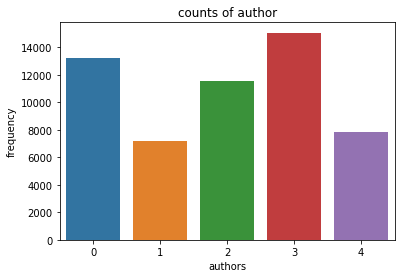

In [10]:
#작가별 countplot
ax=plt.subplots()
ax=sns.countplot('author',data=train)
ax.set_title('counts of author')
ax.set_xlabel('authors')
ax.set_ylabel('frequency')

0,3번째 작가들의 작품이 많다.

## EDA (train)

In [11]:
vocab={}
for sent in train['text']:
    for word in sent.split():
        if word not in vocab.keys():
            vocab[word]=len(vocab)

In [12]:
print(len(vocab)) #vocab_size는 33707

33707


In [13]:
#문장 단어 분포도
text_len=[len(s.split()) for s in train['text']]
print('가장 적은 단어 수 : {}'.format(np.min(text_len)))
print('가장 많은 단어 수 : {}'.format(np.max(text_len)))
print('평균 문장 단어 : {}'.format(np.mean(text_len)))

가장 적은 단어 수 : 0
가장 많은 단어 수 : 214
평균 문장 단어 : 20.70854060751836


In [14]:
text_len[0]

20

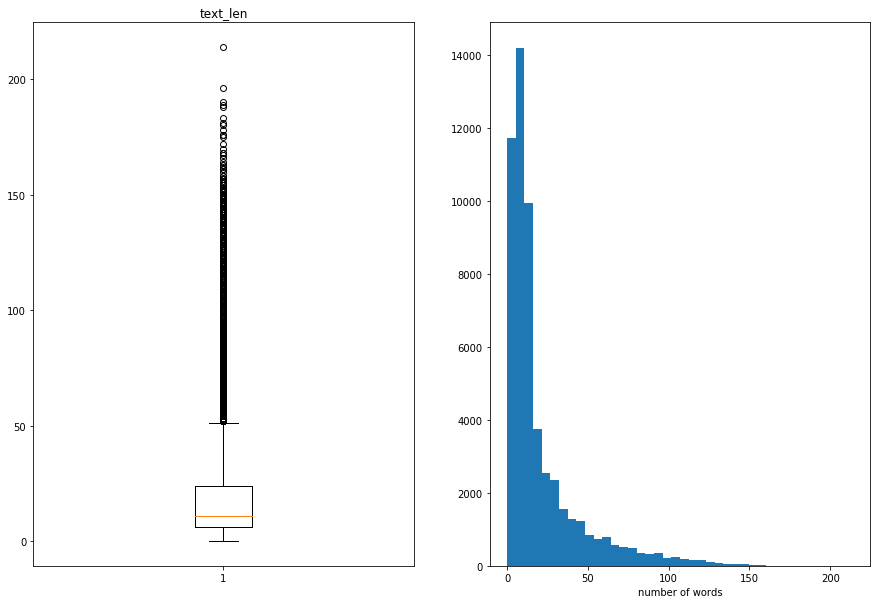

In [15]:
#문장의 단어 분포
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text_len')

plt.subplot(1,2,2)
plt.hist(text_len,bins=40)
plt.xlabel('number of words')
plt.show()

문장 단어의 개수는 100 이하가 대부분이고 제3사분위수가 50,최소값이 0이고 텍스트의 평균은 20이다. 가장 높은 값은 211이다. 

## 문장길이 분포

In [16]:
str_len=[len(s) for s in train['text']]
print('가장 짧은 문장 : {}'.format(np.min(str_len)))
print('가장 긴 문장 : {}'.format(np.max(str_len)))
print('평균 문장 : {}'.format(np.mean(str_len)))

가장 짧은 문장 : 0
가장 긴 문장 : 1429
평균 문장 : 133.0049745804406


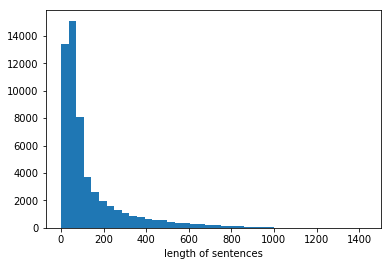

In [17]:
plt.hist(str_len,bins=40)
plt.xlabel('length of sentences')
plt.show()
#가장 긴 문장은 1429, 가장 짧은 문장은 0, 평균문장 길이는 133이다.

## 작가마다 많이 사용한 단어 분포

In [17]:
def plot_wordcloud(text):
    def preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lmtzr=WordNetLemmatizer()
        stemmer = PorterStemmer()
        for a in text:
            tokens = [word for word in nltk.word_tokenize(a)]
            tokens=[lmtzr.lemmatize(word) for word in tokens if len(word)>1]
            tokens = [stemmer.stem(word) for word in tokens ]
            corpus.extend(tokens)
        return corpus
    corpus=preprocess_text(text)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(stopwords),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    wordcloud = wordcloud.generate(str(corpus))
    return wordcloud

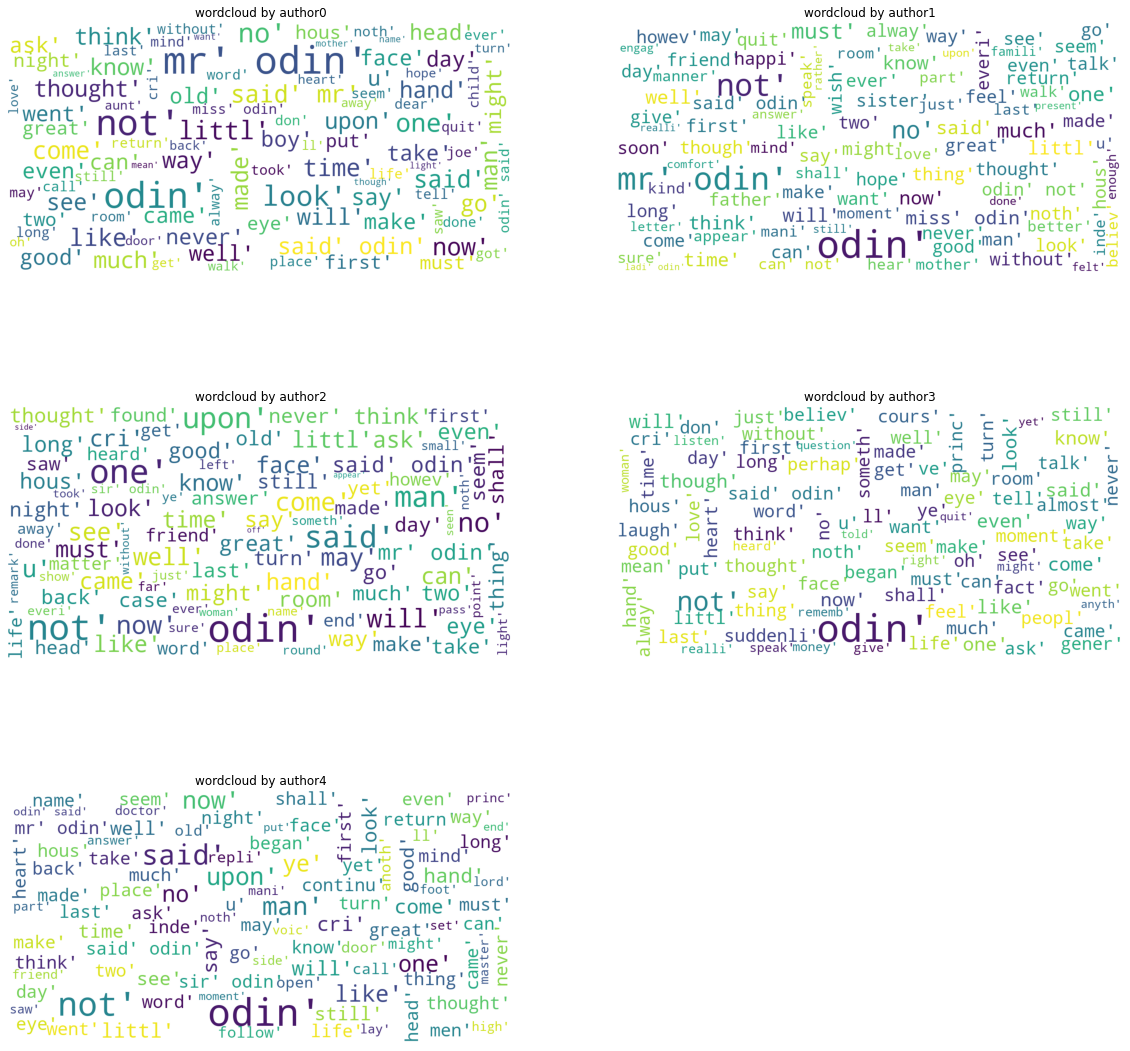

In [18]:
fig=plt.figure(figsize=(20,20))
rows=3
cols=2
for i in range(5):
    wordcloud=plot_wordcloud(train[train['author']==i]['text'])
    ax=fig.add_subplot(rows,cols,i+1)
    ax.axis('off')
    ax.set_title('wordcloud by author{}'.format(i))
    ax.imshow(wordcloud)

In [19]:
#명사만 추출
nltk.download('averaged_perceptron_tagger')
def plot_wordcloud_noun(text,tags=['NN','NLP']):
    def _preprocess_text(text,tags):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in nltk.word_tokenize(news)]
            words=[lem.lemmatize(w) for w in words if len(w)>2]
            
            tagged = nltk.pos_tag(words)
            allnoun = [word for word, pos in tagged if pos in tags]

            corpus.append(allnoun)
        return corpus
    
    corpus=_preprocess_text(text,tags)
    
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))
    
    return wordcloud

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zzang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


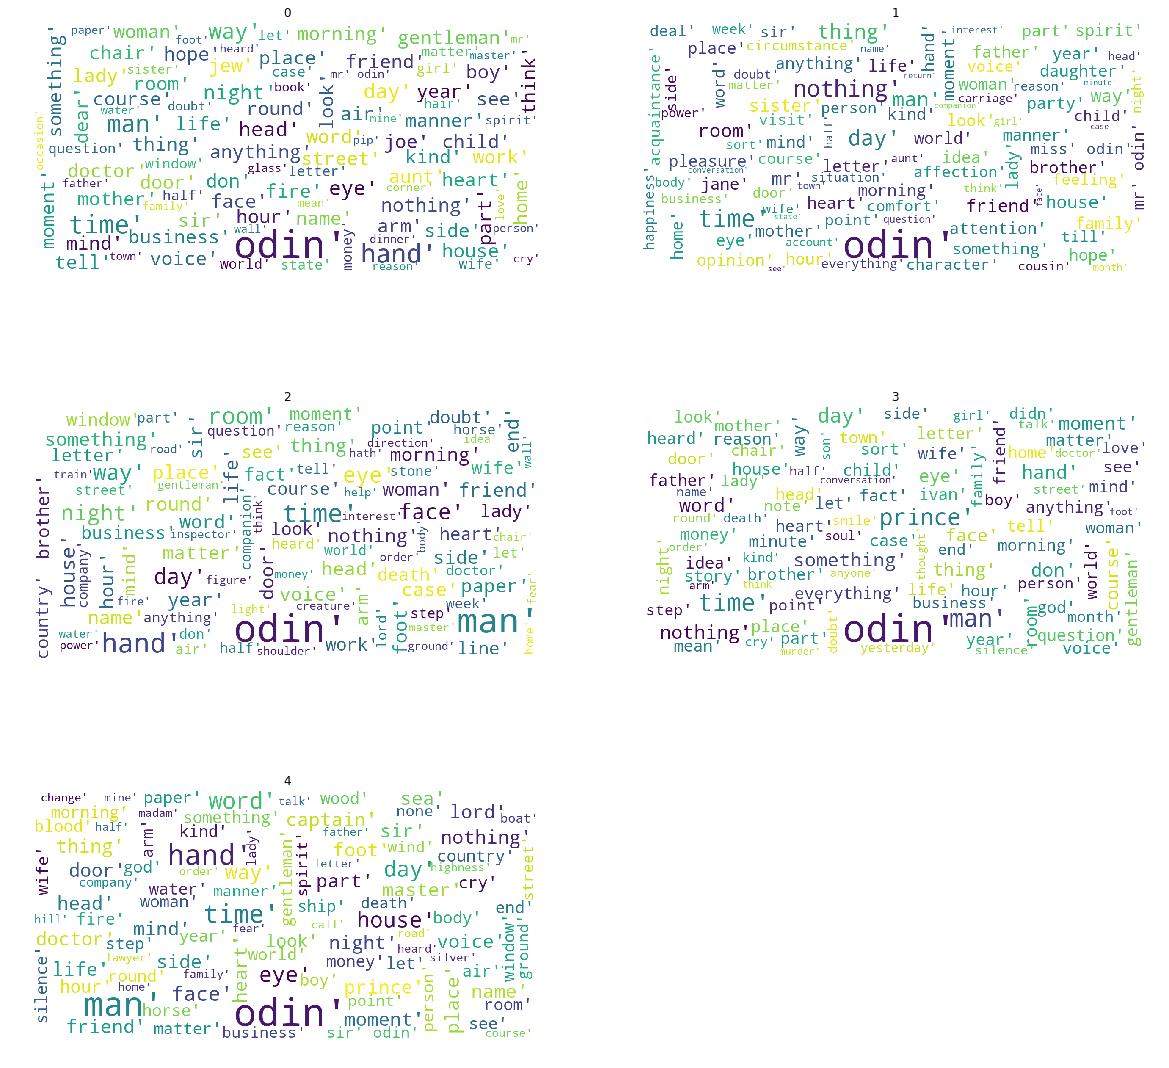

In [37]:
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud_noun(train[train['author']==i]['text'], ['NN','NNP'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.axis('off')
    ax.set_title(i)
    ax.imshow(wordcloud)

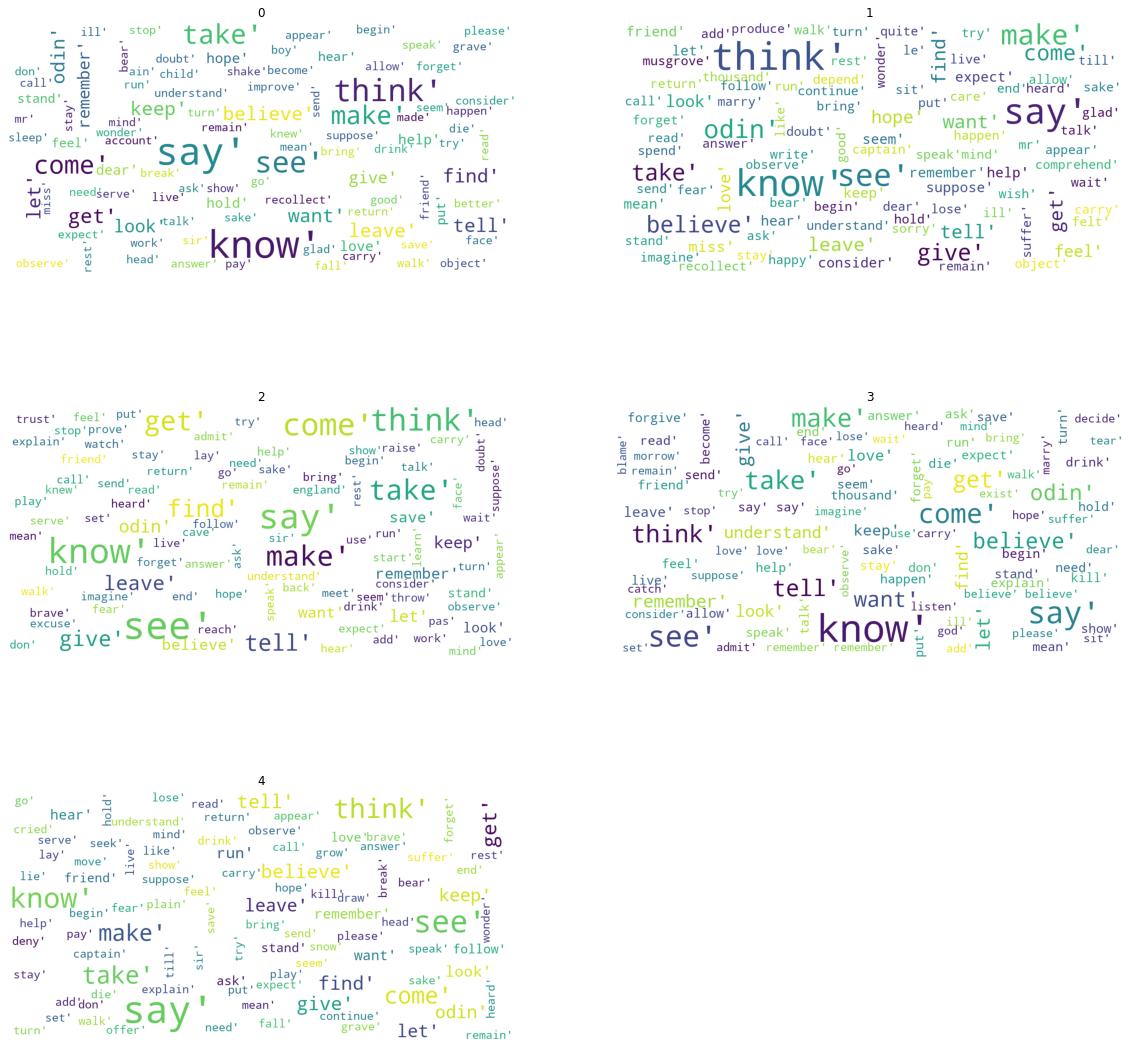

In [20]:
#동사
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud_noun(train[train['author']==i]['text'], ['VB','VBP'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.axis('off')
    ax.set_title(i)
    ax.imshow(wordcloud)

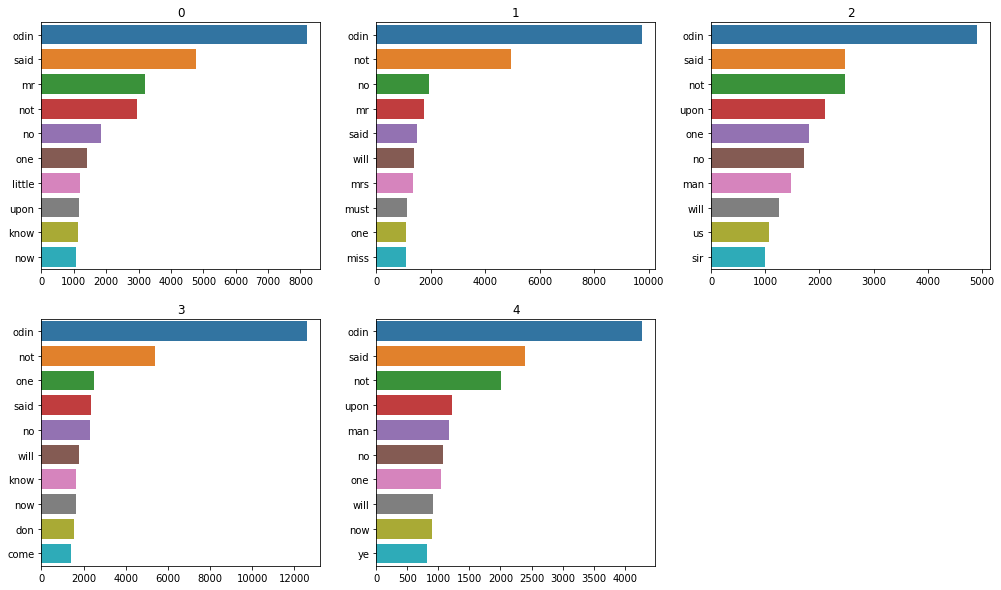

In [21]:
fig=plt.figure(figsize=(17,10)) #전처리 한 상태에서 제일 많이 나온 단어
rows=2
cols=3
def plot_top_non_stopwords_barchart(text):
    new=text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i if len(word)>1]
    counter=Counter(corpus)
    most=counter.most_common()
    x,y=[],[]
    for word,count in most[:10]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
    return x,y
for i in range(5):
    x,y = plot_top_non_stopwords_barchart(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

## Embedding & modeling

### glove

In [18]:
def text2sequence(train_text,max_len=200):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(train_text)
    train_x_seq=tokenizer.texts_to_sequences(train_text)
    vocab_size=len(tokenizer.word_index)+1
    print('vocab size:',vocab_size)
    x_train=pad_sequences(train_x_seq,maxlen=max_len)
    return x_train,vocab_size,tokenizer
train_x, vocab_size, vectorizer = text2sequence(train['text'], max_len = 100)

vocab size: 33708


In [19]:
vocabulary=vectorizer.word_index

In [36]:
#glove 사용
glove=dict()
f=open('./glove.txt','rt', encoding='UTF8')
for line in f:
    values=line.split()
    word=values[0]
    vector=np.asarray(values[1:],dtype='float32')
    glove[word]=vector
f.close()

In [39]:
embedding_matrix=np.zeros((vocab_size,100))
for index,word in enumerate(vocabulary):
    if word in glove:
        embedding_vector=glove[word]
        embedding_matrix[index]=embedding_vector
    else:
        #print('glove에 없는 단어입니다.')
        continue

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니다.
glove에 없는 단어입니

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,100,weights = [embedding_matrix], input_length=100),
    #input_length:max_len,100은 엠베딩 층
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          3370800   
_________________________________________________________________
gru (GRU)                    (None, 64)                31680     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 3,406,965
Trainable params: 3,406,965
Non-trainable params: 0
_________________________________________________________________


In [44]:
x_train = np.array([x for x in train['text']])
x_test = np.array([x for x in test['text']])
y_train = np.array([x for x in train['author']])

In [45]:
y_train

array([3, 2, 1, ..., 1, 3, 0])

In [46]:
num_epochs = 20
history = model.fit(train_x, y_train, 
                    epochs=num_epochs, 
                    validation_split=0.2)

Train on 43903 samples, validate on 10976 samples
Epoch 1/20
43903/43903 [==============================] - 222s 5ms/sample - loss: 1.2115 - acc: 0.4963 - val_loss: 0.8336 - val_acc: 0.6849
Epoch 2/20
43903/43903 [==============================] - 182s 4ms/sample - loss: 0.6553 - acc: 0.7594 - val_loss: 0.7023 - val_acc: 0.7410
Epoch 3/20
43903/43903 [==============================] - 195s 4ms/sample - loss: 0.4510 - acc: 0.8376 - val_loss: 0.7419 - val_acc: 0.7372
Epoch 4/20
43903/43903 [==============================] - 174s 4ms/sample - loss: 0.3635 - acc: 0.8695 - val_loss: 0.8122 - val_acc: 0.7368
Epoch 5/20
43903/43903 [==============================] - 188s 4ms/sample - loss: 0.3103 - acc: 0.8878 - val_loss: 0.8774 - val_acc: 0.7341
Epoch 6/20
43903/43903 [==============================] - 190s 4ms/sample - loss: 0.2752 - acc: 0.8990 - val_loss: 0.9553 - val_acc: 0.7318
Epoch 7/20
43903/43903 [==============================] - 185s 4ms/sample - loss: 0.2460 - acc: 0.9110 - val_l

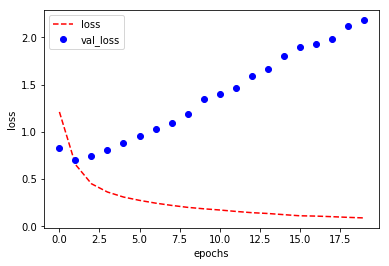

In [47]:
plt.plot(history.history['loss'],'r--',label='loss')
plt.plot(history.history['val_loss'],'bo',label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
#loss값은 줄어들지만 val_loss는 1로 수렴하는 편

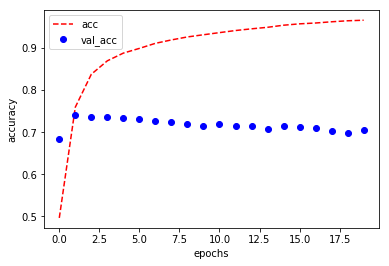

In [49]:
plt.plot(history.history['acc'],'r--',label='acc')
plt.plot(history.history['val_acc'],'bo',label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
#acc는 0.9까지 증가하지만 val_loss는 0.7밖에 안된다. 과적합이 많이 생긴다

## word2vec

In [59]:
import gensim
word2vec=gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)

In [62]:
embedding_matrix = np.zeros((vocab_size, 300)) #300차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in word2vec: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = word2vec[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_matrix[index] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.
    else:
        #print("word2vec에 없는 단어입니다.")
        pass

word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.
word2vec에 없는 단어입니다.


In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,300,weights = [embedding_matrix], input_length=100),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 300)          10112400  
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                70080     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 10,186,965
Trainable params: 10,186,965
Non-trainable params: 0
_________________________________________________________________


In [69]:
num_epochs = 20
history = model.fit(train_x, y_train, 
                    epochs=num_epochs, 
                    validation_split=0.2)

Train on 43903 samples, validate on 10976 samples
Epoch 1/20
43903/43903 [==============================] - 339s 8ms/sample - loss: 1.0761 - acc: 0.5634 - val_loss: 0.7303 - val_acc: 0.7337
Epoch 2/20
43903/43903 [==============================] - 330s 8ms/sample - loss: 0.5734 - acc: 0.7927 - val_loss: 0.6965 - val_acc: 0.7416
Epoch 3/20
43903/43903 [==============================] - 336s 8ms/sample - loss: 0.3983 - acc: 0.8563 - val_loss: 0.7625 - val_acc: 0.7392
Epoch 4/20
43903/43903 [==============================] - 338s 8ms/sample - loss: 0.3113 - acc: 0.8878 - val_loss: 0.8597 - val_acc: 0.7400
Epoch 5/20
43903/43903 [==============================] - 328s 7ms/sample - loss: 0.2556 - acc: 0.9065 - val_loss: 0.9798 - val_acc: 0.7354
Epoch 6/20
43903/43903 [==============================] - 331s 8ms/sample - loss: 0.2201 - acc: 0.9204 - val_loss: 1.0733 - val_acc: 0.7289
Epoch 7/20
43903/43903 [==============================] - 358s 8ms/sample - loss: 0.1946 - acc: 0.9298 - val_l

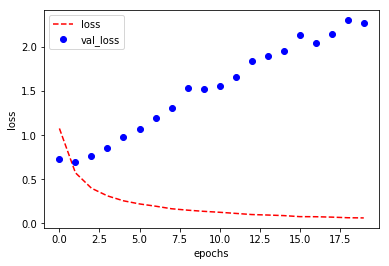

In [70]:
plt.plot(history.history['loss'],'r--',label='loss')
plt.plot(history.history['val_loss'],'bo',label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
#loss값은 줄어들지만 val_loss는 증가하는 편

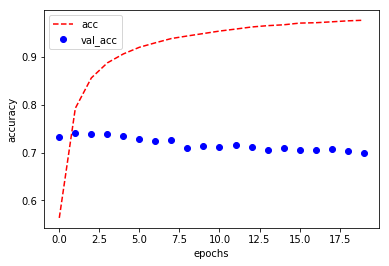

In [72]:
plt.plot(history.history['acc'],'r--',label='acc')
plt.plot(history.history['val_acc'],'bo',label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
#acc는 0.9까지 증가하지만 val_loss는 0.6밖에 안된다. 과적합이 많이 생긴다

### Fasttext

In [50]:
# from gensim.models.keyedvectors import KeyedVectors
# FastText = KeyedVectors.load_word2vec_format('fasttext.bin',
#                 binary=True,encoding='utf-8')
from gensim.models.keyedvectors import KeyedVectors
# 다 읽으려면 너무 시간이 오래 걸려서, 상위 10000개만 읽음.
fasttext = KeyedVectors.load_word2vec_format('fasttext.vec', limit=10000)

In [52]:
embedding_matrix = np.zeros((vocab_size, 100)) #300차원의 임베딩 매트릭스 생성
for index, word in enumerate(vocabulary): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in fasttext: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = fasttext[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_matrix[index] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.
    else:
        continue

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,100,weights = [embedding_matrix], input_length=100),
    #input_length:max_len,300은 엠베딩 층
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          3370800   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                31680     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 3,406,965
Trainable params: 3,406,965
Non-trainable params: 0
_________________________________________________________________


In [55]:
num_epochs = 20
history = model.fit(train_x, y_train, 
                    epochs=num_epochs, 
                    validation_split=0.2)

Train on 43903 samples, validate on 10976 samples
Epoch 1/20
43903/43903 [==============================] - 178s 4ms/sample - loss: 1.0667 - acc: 0.5735 - val_loss: 0.7972 - val_acc: 0.7001
Epoch 2/20
43903/43903 [==============================] - 179s 4ms/sample - loss: 0.6144 - acc: 0.7773 - val_loss: 0.7171 - val_acc: 0.7373
Epoch 3/20
43903/43903 [==============================] - 181s 4ms/sample - loss: 0.4433 - acc: 0.8410 - val_loss: 0.7701 - val_acc: 0.7411
Epoch 4/20
43903/43903 [==============================] - 177s 4ms/sample - loss: 0.3577 - acc: 0.8722 - val_loss: 0.8277 - val_acc: 0.7366
Epoch 5/20
43903/43903 [==============================] - 180s 4ms/sample - loss: 0.3038 - acc: 0.8932 - val_loss: 0.8749 - val_acc: 0.7345
Epoch 6/20
43903/43903 [==============================] - 172s 4ms/sample - loss: 0.2597 - acc: 0.9062 - val_loss: 0.9535 - val_acc: 0.7275
Epoch 7/20
43903/43903 [==============================] - 181s 4ms/sample - loss: 0.2263 - acc: 0.9173 - val_l

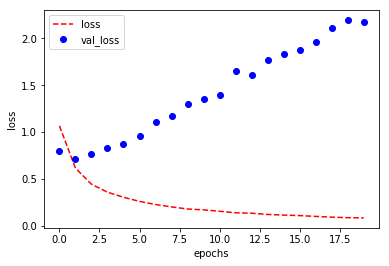

In [56]:
plt.plot(history.history['loss'],'r--',label='loss')
plt.plot(history.history['val_loss'],'bo',label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

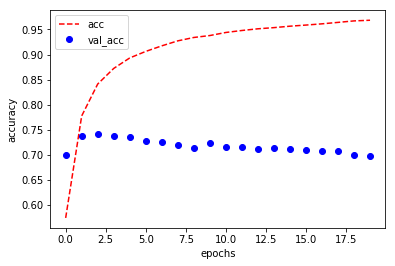

In [58]:
plt.plot(history.history['acc'],'r--',label='acc')
plt.plot(history.history['val_acc'],'bo',label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## 이전 모델링

In [44]:
vocab_size=30000
embedding_dim=16
max_length=200
padding_type='post'

In [45]:
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
word_index=tokenizer.word_index

In [46]:
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [48]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           480000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125       
Total params: 480,533
Trainable params: 480,533
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
num_epochs = 20
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

Train on 43903 samples, validate on 10976 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 15s - loss: 1.5019 - acc: 0.3187 - val_loss: 1.3772 - val_acc: 0.3970
Epoch 2/20
 - 17s - loss: 1.2148 - acc: 0.5083 - val_loss: 1.0856 - val_acc: 0.5928
Epoch 3/20
 - 18s - loss: 0.9526 - acc: 0.6472 - val_loss: 0.9337 - val_acc: 0.6642
Epoch 4/20
 - 16s - loss: 0.8092 - acc: 0.7008 - val_loss: 0.8533 - val_acc: 0.6890
Epoch 5/20
 - 17s - loss: 0.7179 - acc: 0.7376 - val_loss: 0.8025 - val_acc: 0.7029
Epoch 6/20
 - 16s - loss: 0.6509 - acc: 0.7648 - val_loss: 0.7847 - val_acc: 0.7044
Epoch 7/20
 - 16s - loss: 0.5995 - acc: 0.7847 - val_loss: 0.7706 - val_acc: 0.7125
Epoch 8/20
 - 16s - loss: 0.5583 - acc: 0.7984 - val_loss: 0.7686 - val_acc: 0.7121
Epoch 9/20
 - 15s - loss: 0.5253 - acc: 0.8110 - val_loss: 0.7678 - val_acc: 0.7179
Epoch 10/20
 - 14s - loss: 0.4962 - acc: 0.8217 - val_loss: 0.7636 - val_acc: 0.7232
Epoch 11/20
 - 16s - loss: 0.4704 - acc: 0.8319 - val_loss: 0

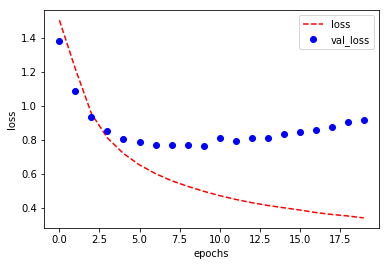

In [50]:
plt.plot(history.history['loss'],'r--',label='loss')
plt.plot(history.history['val_loss'],'bo',label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
#loss값은 줄어들지만 val_loss는 1로 수렴하는 편

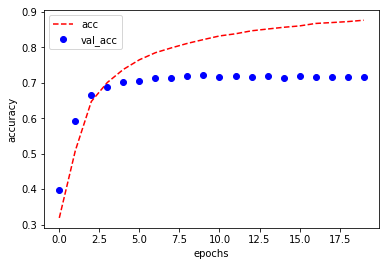

In [51]:
plt.plot(history.history['acc'],'r--',label='acc')
plt.plot(history.history['val_acc'],'bo',label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
#acc는 0.9까지 증가하지만 val_loss는 0.7밖에 안된다. 과적합이 많이 생긴다